# Football Team Analysis and Team Similarity

In this notebook, we will analyse football events from 2011 to 2017 to come up with a few insights regarding football teams in Europe's top 5 leagues. Finally, we will visualize team similarity using Kmeans clustering.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')

import plotly.io as pio
import plotly.express as px

pio.templates.default = "plotly_white"

pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('../input/football-events/events.csv')
ginf=pd.read_csv('../input/football-events/ginf.csv')


In [3]:
definitions = open("../input/football-events/dictionary.txt", "r").readlines()

# Which teams are the best/worst in their home/away games?

By best/worst, we're talking in terms of average goal difference (home goals-away goals). This metric captures both the inclination to win and the scoring performance.

In [4]:
ginf['goal_differential_home-away']=ginf['fthg']-ginf['ftag']

home_perf=ginf.groupby('ht')['goal_differential_home-away'].mean().sort_values()
away_perf=(-1*ginf.groupby('at')['goal_differential_home-away'].mean()).sort_values()

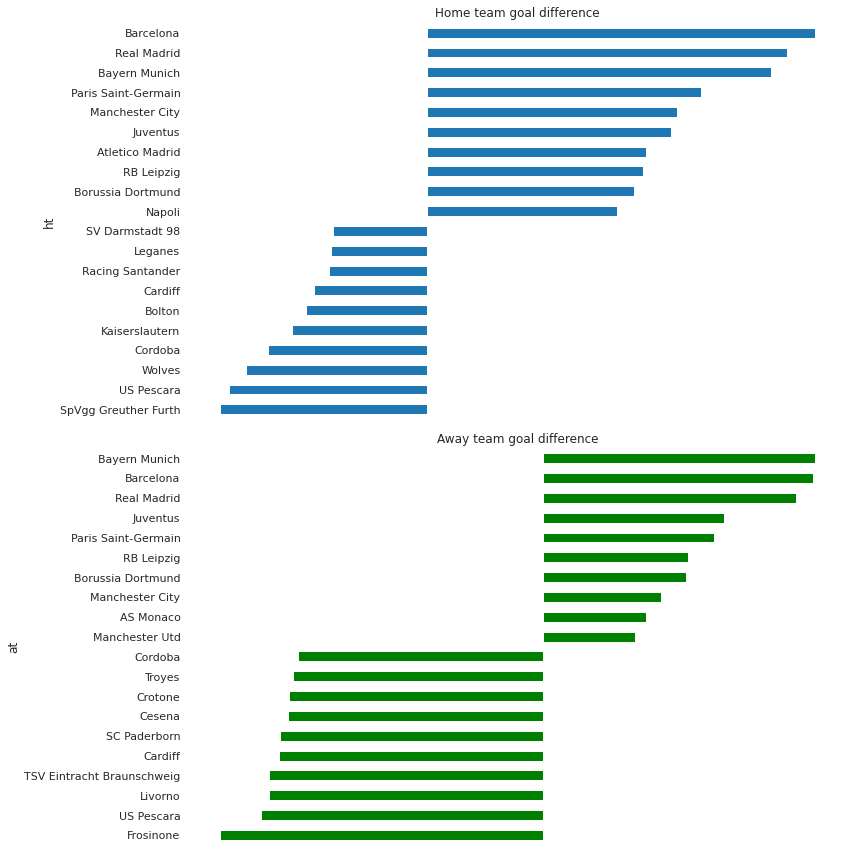

In [5]:
fig, ax=plt.subplots(nrows=2,figsize=(12,12))

ax[0].set_title('Home team goal difference')
pd.concat([home_perf.iloc[:10],home_perf.iloc[-10:]]).plot(kind='barh',ax=ax[0])

ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)
ax[0].spines["bottom"].set_visible(False)
ax[0].spines["left"].set_visible(False)


ax[1].set_title('Away team goal difference')
pd.concat([away_perf.iloc[:10],away_perf.iloc[-10:]]).plot(kind='barh',ax=ax[1],color='green')

ax[1].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)
ax[1].spines["bottom"].set_visible(False)
ax[1].spines["left"].set_visible(False)

ax[0].set_xticks([])
ax[1].set_xticks([])

plt.tight_layout()

Unsurprisingly, the magic trio (Real Madrid, Barca, Bayern) headline when it comes to both home and away performance. Barcelona is the strongest at home and Bayern is the scariest team away.

# Best teams at beating the odds? And which teams can disappoint at home?

These are teams that had the odds stacked against them (betting odds) and won an away game. 
By consequence, this includes teams that lose relatively easy home games.

In [6]:
ginf['odd_diff_home-away']=ginf['odd_h']-ginf['odd_a']

ginf['beating_odds']=ginf['odd_diff_home-away']*np.sign(ginf['goal_differential_home-away'])

In [7]:
medians=ginf[ginf['beating_odds']>0].groupby(['at'])['beating_odds'].median().sort_values() #takes care of outliers but count is important too
counts=ginf[ginf['beating_odds']>0].groupby(['at'])['beating_odds'].count().sort_values(ascending=False)

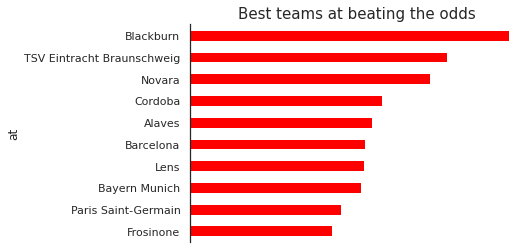

In [8]:
fig,ax=plt.subplots()
medians.iloc[-10:].plot(kind='barh',ax=ax,color='red')
ax.set_title('Best teams at beating the odds',fontsize=15)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.xticks([])
plt.show()

Other than the median, we can look at the count as well to look for teams that consistently beat odds. This seems like a good metric however it can be a bit misleading. Let's look at the cell output below

In [9]:
pd.DataFrame(counts).transpose()

at,Liverpool,Lyon,Bayer Leverkusen,Borussia Monchengladbach,Stade Rennes,Schalke 04,Bordeaux,Real Sociedad,Nice,VfL Wolfsburg,West Brom,Internazionale,Lazio,Chelsea,Napoli,Swansea,Atletico Madrid,FC Augsburg,Malaga,AS Roma,TSG Hoffenheim,Rayo Vallecano,Udinese,Manchester City,Athletic Bilbao,Hamburg SV,Chievo Verona,Toulouse,Valencia,Borussia Dortmund,Southampton,Montpellier,Espanyol,Stoke City,Crystal Palace,Marseille,Manchester Utd,West Ham,St Etienne,Lorient,Hannover 96,Atalanta,Mainz,Genoa,Fiorentina,Newcastle,Real Betis,Granada,Villarreal,Sunderland,Sevilla,Getafe,Levante,Werder Bremen,Bologna,VfB Stuttgart,Lille,AC Milan,Celta Vigo,Real Madrid,Eintracht Frankfurt,Hertha Berlin,Aston Villa,Juventus,Arsenal,Nantes,SC Freiburg,Stade de Reims,Barcelona,Evian Thonon Gaillard,Tottenham,Caen,Everton,Paris Saint-Germain,Torino,Bastia,Sassuolo,FC Cologne,Leicester City,Parma,Guingamp,Palermo,Sampdoria,Nurnberg,AS Monaco,Hellas Verona,Norwich City,Osasuna,Almeria,Wigan,Fulham,Cagliari,AS Nancy Lorraine,Bayern Munich,Valenciennes,Deportivo La Coruna,Empoli,Angers,Sochaux,Bournemouth,Watford,Eibar,Elche,QPR,SV Darmstadt 98,Real Zaragoza,Sporting Gijon,AC Ajaccio,Real Valladolid,Hull,Catania,Mallorca,Bolton,Troyes,FC Ingolstadt 04,Lecce,Las Palmas,Metz,Siena,SpVgg Greuther Furth,Brest,GFC Ajaccio,Dijon FCO,Carpi,Leganes,Burnley,Cesena,Alaves,RB Leipzig,SC Paderborn,US Pescara,Cardiff,Blackburn,AJ Auxerre,Frosinone,Cordoba,Fortuna Dusseldorf,Reading,Kaiserslautern,Lens,Livorno,Middlesbrough,Novara,Wolves,TSV Eintracht Braunschweig,Racing Santander
beating_odds,34,34,31,31,30,30,30,29,29,29,29,28,28,28,28,27,27,26,26,25,25,25,25,25,24,24,24,24,24,23,23,23,23,22,22,22,22,22,22,21,21,21,21,21,21,20,20,20,20,19,19,19,19,19,19,18,18,18,18,18,18,18,17,17,17,17,16,16,16,16,16,16,15,15,14,14,14,14,13,13,13,12,12,11,11,11,11,10,10,10,10,10,9,9,9,9,9,8,8,8,8,8,8,7,7,7,6,6,6,6,6,6,6,5,5,5,5,4,4,4,4,4,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1


We can see that Liverpool and Lyon seem to be the teams that beat their odds consistently. This may seem like a feat, but it's maybe due to the fact that they are already good (but not so good) teams (this was between 2011 and 2017, pre Klopp). Therefore their odds are not as small as one thinks. If we want to look at miracle teams, we use the previous metric which is the median). If we want to look for one-time wonders we can use the higher percentiles.

Let's look at teams that have missed easy games at home.

In [10]:
easy=-1*ginf[ginf['beating_odds']<0].groupby(['ht'])['beating_odds'].median().sort_values() #takes care of outliers bad count is important too

In [11]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(
    x=easy.iloc[:10].index, y=[50 for i in range(1,11)],
    mode='markers',
    marker_size=np.power(easy.iloc[:10].values,1.2))
])

fig.update_yaxes(visible=False, showticklabels=False)
fig.show()

Barcelona, how surprising!! XD

# Last minute savers

Last minute savers are goals scored after the 85th minute and caused their team to salvage a draw or win.
Here, we look for teams that score the most last minute savers.

In [12]:
goals=df[df['shot_outcome']==1]
goals=goals[goals['text'].apply(lambda x:'Goal' in x)]

goals.shape

(23816, 22)

Let's check goal count in ginf

In [13]:
ginf['fthg'].sum()+ginf['ftag'].sum()

27333

Well, we aren't losing much

In [14]:
#selecting last minute goals
late=goals[goals['time']>85]

#merging with ginf to select the matches that include last minute goals
late=late[['id_odsp','event_team']].merge(ginf[['id_odsp','ht','at','goal_differential_home-away']],on='id_odsp')
late['event_team_is_ht']=late['event_team']==late['ht']

#selecting draws and 1-goal margin wins (inclusing last minute wins and last minute honour goals). 
late=late[late['goal_differential_home-away'].isin([-1,0,1])]

In [15]:
#Selecting last minute wins
last_min_win=late[(late['goal_differential_home-away']*late['event_team_is_ht'].apply(lambda x: 1 if x==True else -1))==1] 

#Selecting ties
last_min_tie=late[late['goal_differential_home-away']==0]

last_min=pd.concat([last_min_win,last_min_tie]).drop_duplicates(subset='id_odsp')

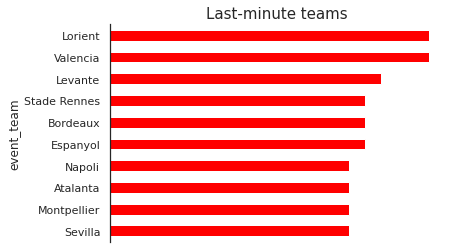

In [16]:
fig,ax=plt.subplots()
pd.DataFrame(last_min.groupby('event_team')['goal_differential_home-away'].count().sort_values()).iloc[-10:].plot(kind='barh',ax=ax,color='red')

ax.set_title('Last-minute teams',fontsize=15)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.xticks([])
ax.get_legend().remove()
plt.show()

To double check the validity of my approach, I took a look at a few matches and verified the last minute saver using the code below.

In [17]:
# last_min[last_min['event_team']=='Valencia'].head()
# #To Check
# df[df['id_odsp']=='YeAJV0sf/'].iloc[-15:]
# ginf[ginf['id_odsp']=='jRPmWlS6/']

# Team similarity (KMeans)

In this section, we prepare a dataset for team performance and apply KMeans clustering.

### Feature Engineering (play situation count, goal situations, assist methods, fouls)

Features are:
* On-pitch violence (yellow cards, red cards, fouls)
* Goalscoring circumstances (play situation, play location, assist method)
* Goal count.

To learn more about the features' definitions, check the file 'dictionary.txt'

In [18]:
teams=df[['id_odsp','event_team','event_type','location','assist_method','situation']]

In [19]:
team_names=teams['event_team'].unique()

#### Violence

In [20]:
yellow=(teams.groupby('event_team')['event_type'].apply(lambda x: (x==4).sum())+teams.groupby('event_team')['event_type'].apply(lambda x: (x==5).sum())) #yellow_cards
red=teams.groupby('event_team')['event_type'].apply(lambda x: (x==6).sum()) #red_cards
foul=teams.groupby('event_team')['event_type'].apply(lambda x: (x==3).sum()) #fouls


#### Goalscoring circumstances

In [21]:
situation=teams.dropna().groupby('event_team')['situation'].value_counts()
location=teams.dropna().groupby('event_team')['location'].value_counts()
assist_method=teams.dropna().groupby('event_team')['assist_method'].value_counts()

In [22]:
#The ugliest piece of code I've ever written
d=dict()
for var in ['situation','location','assist_method']:
    un=teams[var].unique().tolist()
    l=[]
    for i in un:
        sample=teams[teams[var]==i]
        l.append(sample.dropna().groupby('event_team')[var].count())
    d[var]=l

#### Goals

In [23]:
nb_goals=goals.groupby('event_team')['event_team'].count()

#### Concatenating data

In [24]:
data=pd.concat([yellow,red,foul],axis=1)
data.columns=['yellow','red','foul']
data['team']=data.index
data['goals']=nb_goals
data.drop(['foul','red','yellow'],axis=1,inplace=True)

In [25]:
for var in ['situation','location','assist_method']:
    un=teams[var].unique().tolist()
    l=[]
    for i in range(len(un)):
        data[var+'_'+str(un[i])]=data['team'].map(d[var][i].to_dict())

In [26]:
data.dropna(axis=1, how='all', inplace=True)
data.fillna(0, inplace=True)

In [27]:
data.head()

,team,goals,situation_1.0,situation_3.0,situation_4.0,situation_2.0,location_9.0,location_15.0,location_3.0,location_11.0,location_13.0,location_16.0,location_17.0,location_7.0,location_8.0,location_12.0,location_10.0,location_19.0,location_6.0,location_14.0,location_18.0,assist_method_1,assist_method_0,assist_method_2,assist_method_3,assist_method_4
event_team,,,,,,,,,,,,,,,,,,,,,,,,,,
AC Ajaccio,AC Ajaccio,110,913,74,33,86,71,457,336,92,27,24.0,20.0,9.0,10.0,12,13,8.0,9.0,15,3.0,490,344,198,43,31.0
AC Milan,AC Milan,320,2615,219,87,144,215,1465,784,256,93,23.0,19.0,28.0,35.0,29,34,22.0,10.0,51,1.0,1556,865,477,61,106.0
AJ Auxerre,AJ Auxerre,46,364,41,23,18,48,173,123,33,18,5.0,8.0,4.0,4.0,10,10,2.0,6.0,1,1.0,174,144,92,16,20.0
AS Monaco,AS Monaco,228,1387,142,50,86,131,607,558,128,56,11.0,9.0,19.0,16.0,44,32,18.0,8.0,26,2.0,754,446,363,49,53.0
AS Nancy Lorraine,AS Nancy Lorraine,87,874,86,29,69,85,502,261,82,28,17.0,16.0,11.0,4.0,14,15,4.0,7.0,10,2.0,523,267,193,42,33.0


### KMeans

In [28]:
from sklearn.cluster import KMeans

In [29]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(data.drop(['team'],axis=1))
data['labels']=kmeans.labels_

In [30]:
from sklearn.decomposition import PCA
pca = PCA(2)
 
#Transform the data
data2 = pca.fit_transform(data.drop('team',axis=1))

In [31]:
data['var_1']=data2[:,0]
data['var_2']=data2[:,1]

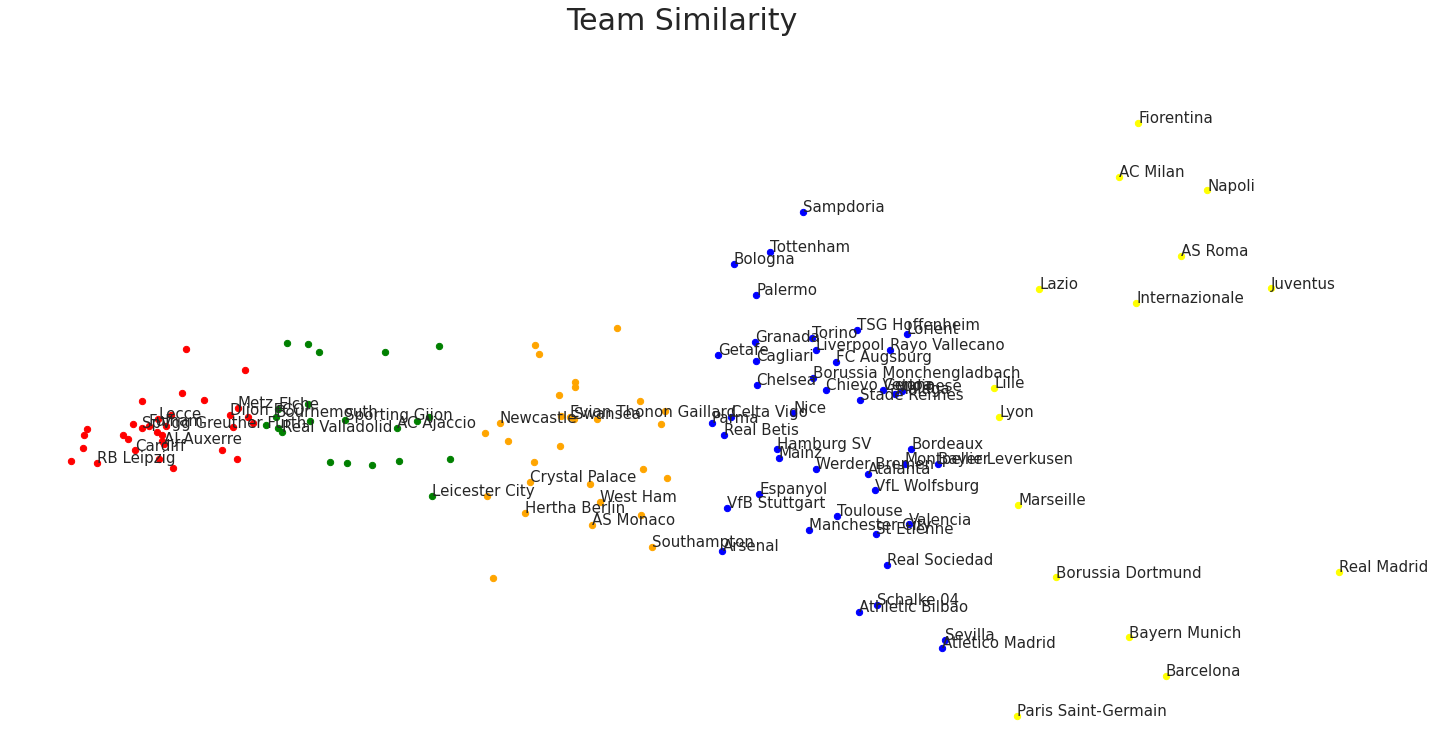

In [32]:
col=['orange','blue','green','red','yellow']


fig, ax = plt.subplots(figsize=(25,12))

fig.suptitle('Team Similarity',fontsize=30)
for i in range (5):
    filt=data[data['labels']==i]
    t=filt['team'].tolist()
    ax.scatter(filt['var_1'],filt['var_2'],color=col[i],s=40)
    
    if 'Real Madrid' in t or 'Arsenal' in t:
        for j, txt in enumerate(t):
            ax.annotate(txt, (filt['var_1'].iloc[j], filt['var_2'].iloc[j]),fontsize=15)
    else:
        for j, txt in enumerate(t):
            if j%4==0:
                ax.annotate(txt, (filt['var_1'].iloc[j], filt['var_2'].iloc[j]),fontsize=15)

plt.axis('off')
plt.show()

The KMeans clustering split the data into 5 clusters. The right-side cluster contains the most popular teams in Europe. It doesn't include Premier League clubs since at the time they weren't as strong as other clubs. They are included in the 2nd cluster to the right. Going to the left the teams become weaker.